In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cmasher as cmr

In [2]:
from plotting_utils import set_rcParams

In [3]:
set_rcParams()

In [149]:
df = pd.read_csv("../../../teaching/infoviz/evaluation/aalto-CUR-191967-3109380-1-en.csv", na_values=["Not applicable"]).dropna(subset=["teachers"])
eval_cols = [c for c in df.columns if c.startswith("eval")]
# for c in eval_cols:
#     df[c] = df[c].astype(float)
df = df[eval_cols].melt()
df["year"] = 2025

In [179]:
df.variable.unique()

array(['eval_overall', 'eval_methods_supported_learning',
       'eval_study_effort', 'eval_workload', 'eval_benefit'], dtype=object)

In [182]:
likert = ["Strongly agree", "Agree", "Neither agree nor disagree", "Disagree", "Strongly disagree"]
legends = {
    "eval_overall": ["Excellent","Very good","Good","Satisfactory","Fair"],
    'eval_methods_supported_learning': likert,
    'eval_study_effort': likert,
    'eval_workload':["Considerably more time", "Slightly more time", "The right amount of time", 
                     "Slightly less time", "Considerably less time"],
    "eval_benefit": likert
}

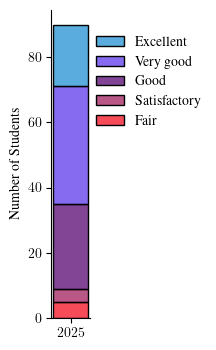

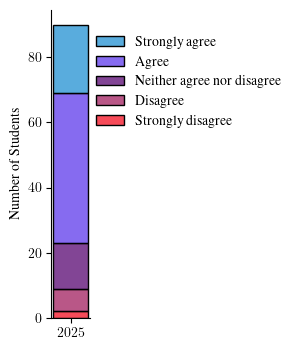

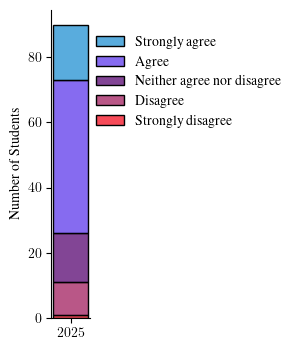

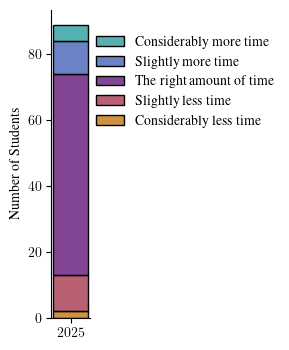

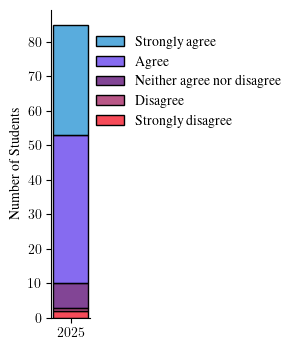

In [193]:
for var_ in df.variable.unique():
    palette = "cmr.guppy_r" if var_ != "eval_workload" else "cmr.infinity_s_r"
    legend = legends[var_]
    
    n_years = df.year.nunique()
    fig, ax = plt.subplots(1,1,figsize=(n_years * 0.5,4), sharey=True)
    sns.histplot(df.query("variable == @var_ and year == year").sort_values("value", ascending=False), x="year", hue="value", 
            hue_order=reversed(["1","2","3","4","5"]), 
            multiple="stack", palette=palette, 
            ax=ax, legend=True if year == df.year.max() else False, #alpha=0.7
    )
    ax.set_xlabel("")
    ax.set_ylabel("Number of Students")
    ax.set_xticks(sorted(df.year.unique()))
    sns.move_legend(ax, (1,0.6), frameon=False, title="", labels=legend)
    sns.despine(fig)
    plt.savefig(f"../../../teaching/infoviz/evaluation/{var_}.pdf", bbox_inches="tight", transparent=True)